# Logistic Regression


## Data preprocessing
✔️ Import the necessary libraries.

✔️ Load dataset (Position_Salaries.csv).

❌ Our dataset doesn't have any missing so, we can skip that step.

❌ We have categorical string data, but they are already label in another column called Level so, we can skip that step as well.

✔️ We only have 400 data. So, we can split and have an 75% training set and 25% test. 

✔️ Logistic regression is more like equation type, but when we apply feature scaling for the dataset it will improve the performance of the model.

In [1]:
# Import libraries....
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# setting two digits after decimal point...
np.set_printoptions(precision=2)

In [2]:
# Load dataset...
dataset = pd.read_csv(r"../dataset/Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values # [row, column]
y = dataset.iloc[:, -1].values

In [3]:
# Split testing and training dataset...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
# Performing feature scaling for the independent variable...
# Dependent variable y is already having 0's & 1's...
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

In [5]:
print(X_train)

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [ 0.38  0.1 ]
 [ 0.88 -0.6 ]
 [ 2.07 -1.18]
 [ 1.08 -0.13]
 [ 0.68  1.78]
 [-0.71  0.56]
 [ 0.78  0.36]
 [ 0.88 -0.54]
 [-1.2  -1.58]
 [ 2.17  0.94]
 [-0.01  1.23]
 [ 0.19  1.08]
 [ 0.38 -0.48]
 [-0.31 -0.31]
 [ 0.98 -0.83]
 [ 0.98  1.87]
 [-0.01  1.26]
 [-0.9   2.27]
 [-1.2  -1.58]
 [ 2.17 -0.8 ]
 [-1.4  -1.47]
 [ 0.38  2.3 ]
 [ 0.78  0.77]
 [-1.   -0.31]
 [ 0.09  0.77]
 [-1.    0.56]
 [ 0.28  0.07]
 [ 0.68 -1.26]
 [-0.51 -0.02]
 [-1.8   0.36]
 [-0.71  0.13]
 [ 0.38  0.3 ]
 [-0.31  0.07]
 [-0.51  2.3 ]
 [ 0.19  0.04]
 [ 1.27  2.22]
 [ 0.78  0.27]
 [-0.31  0.16]
 [-0.01 -0.54]
 [-0.21  0.16]
 [-0.11  0.24]
 [-0.01 -0.25]
 [ 2.17  1.11]
 [-1.8   0.36]
 [ 1.87  0.13]
 [ 0.38 -0.13]
 [-1.2   0.3 ]
 [ 0.78  1.37]
 [-0.31 -0.25]
 [-1.7  -0.05]
 [-1.   -0.74]
 [ 0.28  0.5 ]
 [-0.11 -1.06]
 [-1.1   0.59]
 [ 0.09 -0

In [6]:
print(X_test)

[[-0.8   0.5 ]
 [-0.01 -0.57]
 [-0.31  0.16]
 [-0.8   0.27]
 [-0.31 -0.57]
 [-1.1  -1.44]
 [-0.71 -1.58]
 [-0.21  2.16]
 [-1.99 -0.05]
 [ 0.88 -0.77]
 [-0.8  -0.6 ]
 [-1.   -0.42]
 [-0.11 -0.42]
 [ 0.09  0.22]
 [-1.8   0.48]
 [-0.61  1.37]
 [-0.11  0.22]
 [-1.89  0.45]
 [ 1.67  1.75]
 [-0.31 -1.38]
 [-0.31 -0.65]
 [ 0.88  2.16]
 [ 0.28 -0.54]
 [ 0.88  1.03]
 [-1.5  -1.21]
 [ 1.08  2.07]
 [-1.    0.5 ]
 [-0.9   0.3 ]
 [-0.11 -0.22]
 [-0.61  0.48]
 [-1.7   0.53]
 [-0.11  0.27]
 [ 1.87 -0.28]
 [-0.11 -0.48]
 [-1.4  -0.34]
 [-1.99 -0.51]
 [-1.6   0.33]
 [-0.41 -0.77]
 [-0.71 -1.03]
 [ 1.08 -0.97]
 [-1.1   0.53]
 [ 0.28 -0.51]
 [-1.1   0.42]
 [-0.31 -1.44]
 [ 0.48  1.23]
 [-1.1  -0.34]
 [-0.11  0.3 ]
 [ 1.37  0.59]
 [-1.2  -1.15]
 [ 1.08  0.48]
 [ 1.87  1.52]
 [-0.41 -1.29]
 [-0.31 -0.36]
 [-0.41  1.32]
 [ 2.07  0.53]
 [ 0.68 -1.09]
 [-0.9   0.39]
 [-1.2   0.3 ]
 [ 1.08 -1.21]
 [-1.5  -1.44]
 [-0.61 -1.5 ]
 [ 2.17 -0.8 ]
 [-1.89  0.19]
 [-0.21  0.85]
 [-1.89 -1.26]
 [ 2.17  0.39]
 [-1.4   0

## Train Logistic Regression Model

In [7]:
from sklearn.linear_model import  LogisticRegression
logistic_regression_calssifier = LogisticRegression()
logistic_regression_calssifier.fit(X_train, y_train)

LogisticRegression()

## Predict New Value

In [8]:
print("Y Prediction : ", logistic_regression_calssifier.predict(x_sc.transform([[35,20000]])))
print("Probability [[Age, Estimated Salary]] : ", logistic_regression_calssifier.predict_proba(x_sc.transform([[35,20000]])))

Y Prediction :  [0]
Probability [[Age, Estimated Salary]] :  [[0.96 0.04]]


## Test Logistic Regression Model

In [9]:
y_pred = logistic_regression_calssifier.predict(X_test)
probability = logistic_regression_calssifier.predict_proba(X_test)

print("Comparison of y_pred & y_test", np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1), sep='\n')

Comparison of y_pred & y_test
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Create Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Confusion Matrix : ")
print(matrix)

# Detail view of matrix
print("Detail view of matrix : ")
NO_OF_CATEGORY = len(set(y_test))
for i in range(NO_OF_CATEGORY):
    for j in range(NO_OF_CATEGORY):
        print(f"Expect {j}", f"Predict {i}", ":", matrix[i][j])


Confusion Matrix : 
[[65  3]
 [ 8 24]]
Detail view of matrix : 
Expect 0 Predict 0 : 65
Expect 1 Predict 0 : 3
Expect 0 Predict 1 : 8
Expect 1 Predict 1 : 24


- We have 65 correct prediction of result '0' & 24 correct prediction of result '1'.
- We have 8 incorrect prediction of result '0' & 3 incorrect prediction of result '1'.

## Classification Accuracy Score

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.89


- We have 100 testset where, 65+24=89 result is correct. So, our model accuracy score is 0.89 (89%).

## Classification Report

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['Age', 'Estimated Salary']))

                  precision    recall  f1-score   support

             Age       0.89      0.96      0.92        68
Estimated Salary       0.89      0.75      0.81        32

        accuracy                           0.89       100
       macro avg       0.89      0.85      0.87       100
    weighted avg       0.89      0.89      0.89       100



## Visualising Train Set Result

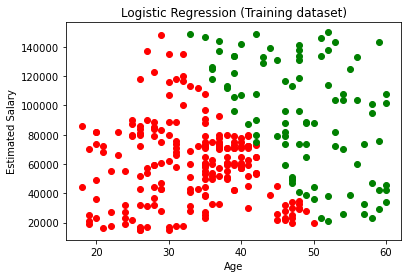

In [13]:
for i in x_sc.inverse_transform(X_train):
    y_pred = logistic_regression_calssifier.predict(x_sc.transform([i]))
    plt.scatter(x=i[0], y=i[1], color=('red', 'green')[y_pred[0]])
plt.title("Logistic Regression (Training dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

## Visualising Test Set Result

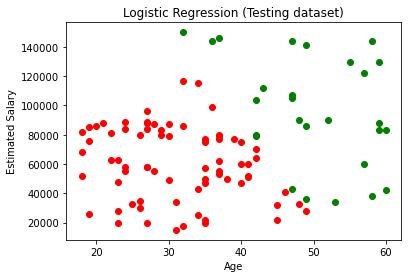

In [14]:
for i in x_sc.inverse_transform(X_test):
    y_pred = logistic_regression_calssifier.predict(x_sc.transform([i]))
    plt.scatter(x=i[0], y=i[1], color=('red', 'green')[y_pred[0]])
plt.title("Logistic Regression (Testing dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()